In [1]:
##########################################################################
# Created on Mon Jun 11 21:45:13 2020                                    #
# Knowledge Transfer for MUMSS Project [Option]                          #
# @author: Meng Lipeng (FRM, CFA Level3 Candidate)                       #
##########################################################################

# Option Valuation

## 1.Binomial Tree

### Construct Binomial Tree

In [2]:
def binomial_grid(n):
    import networkx as nx
    G = nx.Graph()
    for i in range(0, n + 1):
        for j in range(1, i + 2):
            if i < n:
                G.add_edge((i, j), (i + 1, j))
                G.add_edge((i, j), (i + 1, j + 1))

    posG = {}
    for node in G.nodes():
        posG[node] = (
         node[0], n + 2 + node[0] - 2 * node[1])

    nx.draw(G, pos=posG)

In [3]:
from math import sqrt,exp 
import matplotlib.pyplot as plt

In [36]:
s=810
r=0.05
sigma=0.2
T=6./12
x=800
n=2
deltaT=T/n
q=0.02 
u=exp(sigma*sqrt(deltaT))
d=1/u 
a=exp((r-q)*deltaT)
p=(a-d)/(u-d) 
su=round(s*u,2);
suu=round(s*u*u,2) 
sd=round(s*d,2)
sdd=round(s*d*d,2) 
sud=s

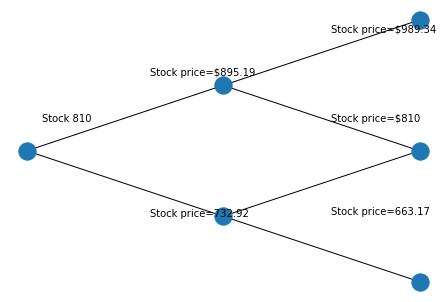

In [37]:
plt.figtext(0.08,0.6,'Stock '+str(s)) 
plt.figtext(0.33,0.76,"Stock price=$"+str(su)) 
plt.figtext(0.33,0.27,'Stock price='+str(sd)) 
plt.figtext(0.75,0.91,'Stock price=$'+str(suu)) 
plt.figtext(0.75,0.6,'Stock price=$'+str(sud)) 
plt.figtext(0.75,0.28,"Stock price="+str(sdd)) 
binomial_grid(n)
plt.show()

In [38]:
import numpy as np

In [39]:
s_dollar='S=$'
c_dollar='c=$' 
p2=round(p,2)

In [40]:
# at level 2 
c_suu=round(max(suu-x,0),2) 
c_s=round(max(s-x,0),2) 
c_sdd=round(max(sdd-x,0),2) 

In [41]:
# at level 1
c_01=round((p*c_suu+(1-p)*c_s)*np.exp(-r*deltaT),2) 
c_02=round((p*c_s+(1-p)*c_sdd)*np.exp(-r*deltaT),2)

In [42]:
# at level 0 (today)
c_00=round(p*np.exp(-r*deltaT)*c_01+(1-p)*np.exp(-r*deltaT)*c_02,2) 

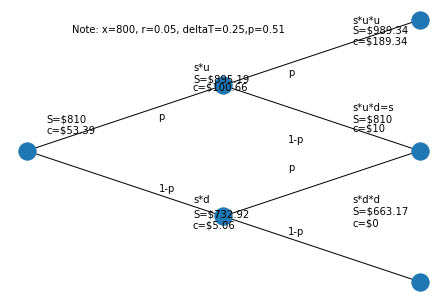

In [43]:

plt.figtext(0.15,0.91,'Note: x='+str(x)+', r='+str(r)+', deltaT='+str(deltaT)+',p='+str(p2))
plt.figtext(0.35,0.61,'p')
plt.figtext(0.65,0.76,'p')
plt.figtext(0.65,0.43,'p')
plt.figtext(0.35,0.36,'1-p')
plt.figtext(0.65,0.53,'1-p')
plt.figtext(0.65,0.21,'1-p')

plt.figtext(0.8,0.94,'s*u*u') 
plt.figtext(0.8,0.91,s_dollar+str(suu)) 
plt.figtext(0.8,0.87,c_dollar+str(c_suu)) 
plt.figtext(0.8,0.6,s_dollar+str(sud)) 
plt.figtext(0.8,0.64,'s*u*d=s') 
plt.figtext(0.8,0.57,c_dollar+str(c_s)) 
plt.figtext(0.8,0.32,'s*d*d') 
plt.figtext(0.8,0.28,s_dollar+str(sdd)) 
plt.figtext(0.8,0.24,c_dollar+str(c_sdd))

plt.figtext(0.43,0.78,'s*u') 
plt.figtext(0.43,0.74,s_dollar+str(su)) 
plt.figtext(0.43,0.71,c_dollar+str(c_01)) 
plt.figtext(0.43,0.32,'s*d') 
plt.figtext(0.43,0.27,s_dollar+str(sd)) 
plt.figtext(0.43,0.23,c_dollar+str(c_02))

plt.figtext(0.09,0.6,s_dollar+str(s)) 
plt.figtext(0.09,0.56,c_dollar+str(c_00)) 
binomial_grid(n)
plt.show()

### European Call 

In [52]:
def binomialCallEuropean(s,x,T,r,q,sigma,n=100):
    """
    s = spot price
    x = strike price
    T = maturity
    r = risk-free rate
    q = dividend yield
    sigma = volatility of underlying
    n = number of steps
    """
    from math import exp,sqrt 
    deltaT = T /n
    u = exp(sigma * sqrt(deltaT)) 
    d = 1.0 / u
    a = exp((r-q) * deltaT)
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i + 1)]  for i in range(n + 1)] 
    for j in range(n+1):
        v[n][j] = max(s * u**j * d**(n - j) - x, 0.0) 
    for i in range(n-1, -1, -1):
        for j in range(i + 1):
            v[i][j]=exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j]) 
    return v[0][0]

In [55]:
binomialCallEuropean(810,800,0.5,0.05,0.02,0.2,2)

53.39471637496134

## 2.BSM Model

In [98]:
def bs_call(S, X, T, rf, sigma):
    """
       Objective: Black-Schole-Merton option model
       Format   : bs_call(S,X,T,r,sigma)
               S: current stock price
               X: exercise price
               T: maturity date in years
              rf: risk-free rate (continusouly compounded)
           sigma: volatiity of underlying security 
       Example 1:  
         >>>bs_call(40,40,1,0.1,0.2)
         5.3078706338643578
    """
    from numpy import log, exp, sqrt
    from scipy import stats
    d1 = (log(S / X) + (rf + sigma * sigma / 2.0) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    return S * stats.norm.cdf(d1) - X * exp(-rf * T) * stats.norm.cdf(d2)

In [99]:
bs_call(10,9,0.5,0.05,0.2)

1.3498517482637222

In [100]:
def bs_put(S, X, T, rf, sigma):
    """
       Objective: Black-Schole-Merton option model
       Format   : bs_call(S,X,T,r,sigma)
               S: current stock price
               X: exercise price
               T: maturity date in years
              rf: risk-free rate (continusouly compounded)
           sigma: volatiity of underlying security 
       Example 1: 
       >>> put=bs_put(40,40,0.5,0.05,0.2)
       >>> round(put,2)
       1.77
    """
    from numpy import log, exp, sqrt
    from scipy import stats
    d1 = (log(S / X) + (rf + sigma * sigma / 2.0) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    return X * exp(-rf * T) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)

In [101]:
bs_put(10,9,0.5,0.05,0.2)

0.12764095651871643

## 3.Put-Call Parity

In [102]:
import pylab as pl 
import numpy as np 
x=10
sT=np.arange(0,30,5) 
payoff_call=(abs(sT-x)+sT-x)/2 
payoff_put=(abs(x-sT)+x-sT)/2 
cash=np.zeros(len(sT))+x

In [103]:
def graph(text,text2=''): 
    pl.xticks(())
    pl.yticks(())
    pl.xlim(0,30)
    pl.ylim(0,20) 
    pl.plot([x,x],[0,3])
    pl.text(x,-2,"X");
    pl.text(0,x,"X")
    pl.text(x,x*1.7, text, ha='center', va='center',size=10, alpha=.5) 
    pl.text(-5,10,text2,size=25)

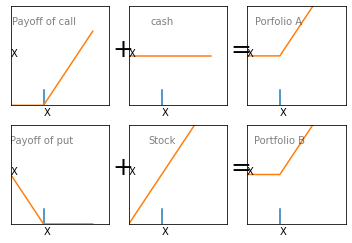

In [104]:
pl.figure(figsize=(6, 4))
pl.subplot(2, 3, 1); graph('Payoff of call');	   pl.plot(sT,payoff_call) 
pl.subplot(2, 3, 2); graph('cash','+');	         pl.plot(sT,cash)
pl.subplot(2, 3, 3); graph('Porfolio A ','=');   pl.plot(sT,cash+payoff_call)
pl.subplot(2, 3, 4); graph('Payoff of put ');	   pl.plot(sT,payoff_put) 
pl.subplot(2, 3, 5); graph('Stock','+');	   pl.plot(sT,sT)
pl.subplot(2, 3, 6); graph('Portfolio B','=');   pl.plot(sT,sT+payoff_put) 
pl.show()

## 4.Greeks

### Delta

In [126]:
from numpy import log, exp, sqrt
from scipy.stats import norm
    
tiny=1e-9
S=40
X=40
T=0.5
r=0.01
sigma=0.2

In [130]:
def delta_option(S, X, T, rf, sigma,optype,positype):
    """
       Objective: detal based on the Black-Schole-Merton option model
       Format   : delta_call(S,X,T,r,sigma)
               S: current stock price
               X: exercise price
               T: maturity date in years
              rf: risk-free rate (continusouly compounded)
           sigma: volatiity of underlying security 
          optype: call/put
        positype: long/short
       Example 1:  
         >>>from p4f import *
         >>> round(delta_call(40,40,1,0.1,0.2,call,long),4)
        0.7257

    """
    d1 = (log(S / X) + (rf + sigma * sigma / 2.0) * T) / (sigma * sqrt(T))
    if optype == 'call':
        if positype == 'long':
            delta = norm.cdf(d1)
        else:
            delta = -norm.cdf(d1)
    else:
        if positype == 'long':
            delta = norm.cdf(d1)-1
        else:
            delta = 1-norm.cdf(d1)
        
    return delta

In [131]:
def delta2(S,X,T,r,sigma):
    s1=S
    s2=S+tiny
    c1=bs_call(s1,X,T,r,sigma)
    c2=bs_call(s2,X,T,r,sigma)
    delta=(c2-c1)/(s2-s1)
    return delta

In [132]:
print("delta (close form)=", delta_option(S,X,T,r,sigma,'call','long'))
print("delta (tiny number)=", delta2(S,X,T,r,sigma))

delta (close form)= 0.5422350133116141
delta (tiny number)= 0.5422383594932392


### Relation between underlying price and delta

In [133]:
S_list=np.linspace(20,60,1000)
Delta_call = delta_option(S_list,X,T,r,sigma,'call','long')
Delta_put = delta_option(S_list,X,T,r,sigma,'put','long')

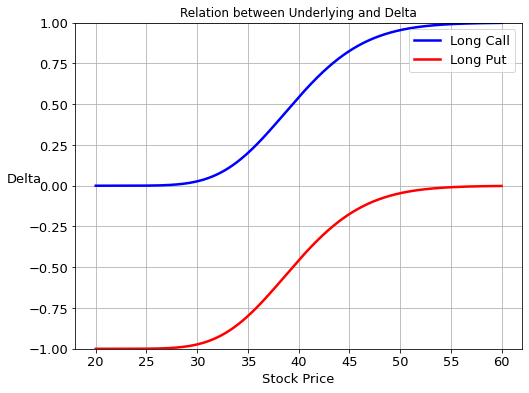

In [134]:
plt.figure(figsize=(8,6))
plt.plot(S_list,Delta_call,'b-',label='Long Call',lw=2.5)
plt.plot(S_list,Delta_put,'r-',label='Long Put',lw=2.5)
plt.xlabel('Stock Price',fontsize=13)
plt.ylabel('Delta',fontsize=13,rotation=0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(-1.0,1.0)
plt.title('Relation between Underlying and Delta')
plt.legend(fontsize=13)
plt.grid('True')
plt.show()